In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.makedirs('figures/performance', exist_ok=True)

def map_experiment(experiment):
    parts = experiment.split('_')
    if "bits" in parts[-1]:
        del parts[-1]
    
    if 'zero' in experiment:
        return {
            'layer_strategy': 'zero',
            'layer_set': np.nan,
            'num_bits': np.nan,
            'experiment_description': f'Model with no quantization'
        }
    elif 'all' in experiment:
        return {
            'layer_strategy': 'all',
            'layer_set': np.nan,
            'num_bits': parts[-1],
            'experiment_description': f'Model with all layers quantized to {parts[-1]} bits'
        }
    else:
        layer_strategy = f"{parts[-4]}_{parts[-3]}"
        layer_set = int(parts[-2])
        num_bits = parts[-1]
        
        layer_set_description = {
            1: 'first quarter',
            2: 'second quarter',
            3: 'third quarter',
            4: 'fourth quarter'
        }
        
        return {
            'layer_strategy': layer_strategy,
            'layer_set': layer_set_description[layer_set],
            'num_bits': num_bits,
            'experiment_description': f'Model with {layer_strategy} of layers ({layer_set_description[layer_set]}) quantized to {num_bits} bits'
        }
    

benchmark_datasets = {
    "Multi-doc QA": [
        "hotpotqa",
        "2wikimqa",
        "musique",
        "dureader"
    ],
    "Single-doc QA": [
        "multifieldqa_en",
        "multifieldqa_zh",
        "narrativeqa",
        "qasper"
    ],
    "Summarization": [
        "gov_report",
        "qmsum",
        "multi_news",
        "vcsum"
    ],
    "Few shot": [
        "triviaqa",
        "samsum",
        "trec",
        "lsht"
    ],
    "Synthetic": [
        "passage_retrieval_en",
        "passage_count",
        "passage_retrieval_zh"
    ],
    "Code": [
        "lcc",
        "repobench-p"
    ]
}
LONG_BENCH_COLS = list(benchmark_datasets.keys())

In [2]:
experiment_paths = ['perplexity_experiments/' + file  for file in  os.listdir('perplexity_experiments/')]
ppl_data = pd.DataFrame(experiment_paths, columns=['experiment_path'])
ppl_data['experiment_name'] = ppl_data['experiment_path'].apply(lambda x: x.split('/')[-1][:-4])
ppl_data['experiment'] = ppl_data['experiment_name'].apply(map_experiment)
ppl_data[['layer_strategy', 'layer_set', 'num_bits', 'experiment_description']] = pd.DataFrame(ppl_data['experiment'].tolist(), index=ppl_data.index)
ppl_data = ppl_data.drop(columns = ['experiment'])
ppl_data['num_bits'] = ppl_data['num_bits'].astype(float)
ppl_data


,experiment_path,experiment_name,layer_strategy,layer_set,num_bits,experiment_description
0,perplexity_experiments/experiment_3_4_2_2_bits...,experiment_3_4_2_2_bits,3_4,second quarter,2.0,Model with 3_4 of layers (second quarter) quan...
1,perplexity_experiments/experiment_1_4_2_4_bits...,experiment_1_4_2_4_bits,1_4,second quarter,4.0,Model with 1_4 of layers (second quarter) quan...
2,perplexity_experiments/experiment_all_4_bits.csv,experiment_all_4_bits,all,NaN,4.0,Model with all layers quantized to 4 bits
3,perplexity_experiments/experiment_1_2_2_4_bits...,experiment_1_2_2_4_bits,1_2,second quarter,4.0,Model with 1_2 of layers (second quarter) quan...
4,perplexity_experiments/experiment_zero.csv,experiment_zero,zero,NaN,NaN,Model with no quantization
5,perplexity_experiments/experiment_all_2_bits.csv,experiment_all_2_bits,all,NaN,2.0,Model with all layers quantized to 2 bits
6,perplexity_experiments/experiment_1_2_2_2_bits...,experiment_1_2_2_2_bits,1_2,second quarter,2.0,Model with 1_2 of layers (second quarter) quan...
7,perplexity_experiments/experiment_3_4_2_4_bits...,experiment_3_4_2_4_bits,3_4,second quarter,4.0,Model with 3_4 of layers (second quarter) quan...
8,perplexity_experiments/experiment_1_4_2_2_bits...,experiment_1_4_2_2_bits,1_4,second quarter,2.0,Model with 1_4 of layers (second quarter) quan...
9,perplexity_experiments/experiment_3_4_1_4_bits...,experiment_3_4_1_4_bits,3_4,first quarter,4.0,Model with 3_4 of layers (first quarter) quant...


In [3]:
data = pd.read_csv("performance_detailed_long_bench.csv")

for k, v in benchmark_datasets.items():
    data[k] = data[v].mean(axis=1)

data = data[['experiment_description', 'layer_strategy','layer_set','num_bits'] + list(benchmark_datasets.keys()) ]

data['avg_score'] =  data[benchmark_datasets.keys()].mean(axis = 1)
data = data.sort_values(by='avg_score', ascending=False)
print(data.to_string())

                                           experiment_description layer_strategy       layer_set  num_bits  Multi-doc QA  Single-doc QA  Summarization  Few shot  Synthetic    Code  avg_score
0                                      Model with no quantization           zero             NaN       NaN       15.3500        22.2425        18.4500   51.4375   7.730000  55.320  28.421667
1   Model with 1_4 of layers (fourth quarter) quantized to 4 bits            1_4  fourth quarter       4.0       15.3900        22.2925        18.2775   51.6750   7.263333  55.190  28.348056
2   Model with 1_2 of layers (second quarter) quantized to 4 bits            1_2  second quarter       4.0       14.7650        22.9225        18.2150   51.6150   7.060000  55.120  28.282917
4   Model with 1_4 of layers (second quarter) quantized to 4 bits            1_4  second quarter       4.0       15.4450        21.8775        18.2900   51.6075   7.076667  55.265  28.260278
3                       Model with all layers

In [4]:
data = pd.read_csv("performance_detailed_long_bench.csv")

for k, v in benchmark_datasets.items():
    data[k] = data[v].mean(axis=1)

data = data[['experiment_description', 'layer_strategy','layer_set','num_bits'] + list(benchmark_datasets.keys()) ]

data['avg_score'] =  data[benchmark_datasets.keys()].mean(axis = 1)
avg_data = data.sort_values(by = 'avg_score', ascending = False)
avg_data['score_diff'] = avg_data['avg_score'].shift(1) - avg_data['avg_score']
avg_data['cumulative_score_diff'] = avg_data['score_diff'].cumsum()

avg_data['score_percent_diff'] = avg_data['avg_score'] / avg_data['avg_score'].shift(-1) - 1
avg_data['cumulative_score_percent_diff'] = (1 + avg_data['score_percent_diff']).cumprod() - 1

avg_data['score_percent_diff'] = avg_data['score_percent_diff'].apply(lambda x: f"{x:.2%}")
avg_data['cumulative_score_percent_diff'] = avg_data['cumulative_score_percent_diff'].apply(lambda x: f"{x:.2%}")
avg_data = avg_data.reset_index(drop=True)



In [5]:
ppl_data = ppl_data.merge(avg_data.drop(['layer_strategy', 'layer_set', 'num_bits'], axis = 1), on = ['experiment_description',], how = 'left')
ppl_data = ppl_data.sort_values(by = 'avg_score', ascending = False).reset_index(drop = True)
ppl_data

,experiment_path,experiment_name,layer_strategy,layer_set,num_bits,experiment_description,Multi-doc QA,Single-doc QA,Summarization,Few shot,Synthetic,Code,avg_score,score_diff,cumulative_score_diff,score_percent_diff,cumulative_score_percent_diff
0,perplexity_experiments/experiment_zero.csv,experiment_zero,zero,NaN,NaN,Model with no quantization,15.3500,22.2425,18.4500,51.4375,7.730000,55.320,28.421667,NaN,NaN,0.26%,0.26%
1,perplexity_experiments/experiment_1_4_4_4_bits...,experiment_1_4_4_4_bits,1_4,fourth quarter,4.0,Model with 1_4 of layers (fourth quarter) quan...,15.3900,22.2925,18.2775,51.6750,7.263333,55.190,28.348056,0.073611,0.073611,0.23%,0.49%
2,perplexity_experiments/experiment_1_2_2_4_bits...,experiment_1_2_2_4_bits,1_2,second quarter,4.0,Model with 1_2 of layers (second quarter) quan...,14.7650,22.9225,18.2150,51.6150,7.060000,55.120,28.282917,0.065139,0.138750,0.08%,0.57%
3,perplexity_experiments/experiment_1_4_2_4_bits...,experiment_1_4_2_4_bits,1_4,second quarter,4.0,Model with 1_4 of layers (second quarter) quan...,15.4450,21.8775,18.2900,51.6075,7.076667,55.265,28.260278,0.022639,0.161389,0.07%,0.64%
4,perplexity_experiments/experiment_all_4_bits.csv,experiment_all_4_bits,all,NaN,4.0,Model with all layers quantized to 4 bits,15.4050,22.5225,18.1500,51.7125,6.663333,54.995,28.241389,0.018889,0.180278,0.15%,0.79%
5,perplexity_experiments/experiment_3_4_1_4_bits...,experiment_3_4_1_4_bits,3_4,first quarter,4.0,Model with 3_4 of layers (first quarter) quant...,15.4400,22.2275,18.0850,51.5650,6.686667,55.185,28.198194,0.043194,0.223472,0.02%,0.81%
6,perplexity_experiments/experiment_1_2_1_4_bits...,experiment_1_2_1_4_bits,1_2,first quarter,4.0,Model with 1_2 of layers (first quarter) quant...,15.2000,22.2825,18.1500,51.6675,7.036667,54.825,28.193611,0.004583,0.228056,0.01%,0.82%
7,perplexity_experiments/experiment_1_4_1_4_bits...,experiment_1_4_1_4_bits,1_4,first quarter,4.0,Model with 1_4 of layers (first quarter) quant...,15.1975,22.2775,18.3550,51.5875,6.706667,55.025,28.191528,0.002083,0.230139,0.09%,0.91%
8,perplexity_experiments/experiment_1_4_3_4_bits...,experiment_1_4_3_4_bits,1_4,third quarter,4.0,Model with 1_4 of layers (third quarter) quant...,15.1275,22.1800,18.3425,51.3750,6.713333,55.255,28.165556,0.025972,0.256111,0.26%,1.17%
9,perplexity_experiments/experiment_3_4_2_4_bits...,experiment_3_4_2_4_bits,3_4,second quarter,4.0,Model with 3_4 of layers (second quarter) quan...,15.0375,22.1075,18.1925,51.6450,6.650000,54.920,28.092083,0.073472,0.329583,0.14%,1.31%


# Overall Comparison

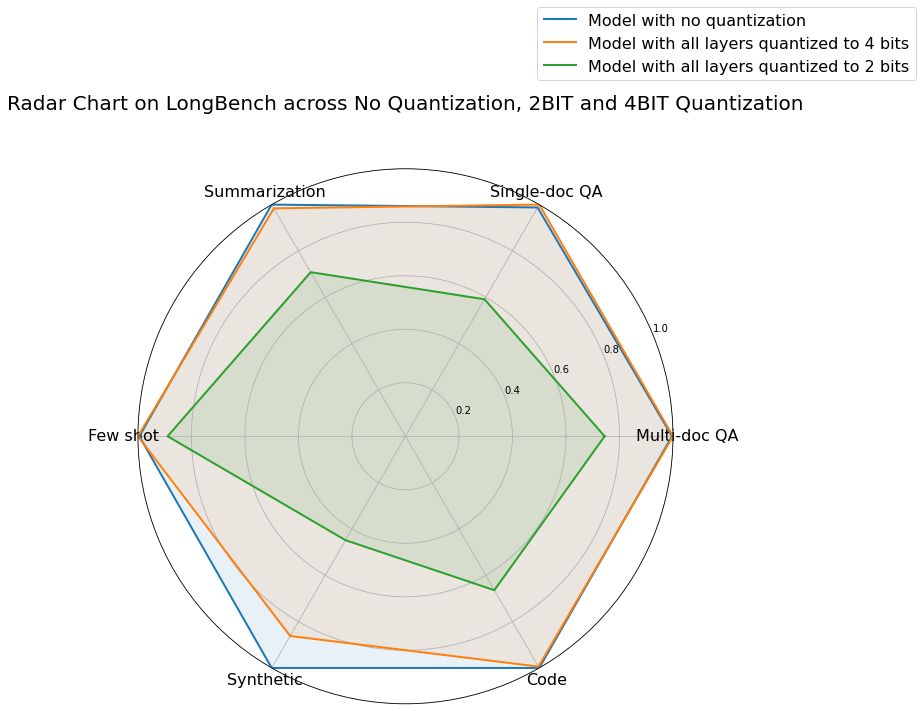

In [6]:
## top 3 performing experiments
df = avg_data.query('layer_strategy == "all" or layer_strategy == "zero"').sort_values(by = 'avg_score', ascending = False).reset_index(drop = True).head(3)
linestyle = ['-', '-', '-']

columns_to_normalize = ['Multi-doc QA', 'Single-doc QA', 'Summarization', 'Few shot', 'Synthetic', 'Code']
df_normalized = df.copy()
df_normalized[columns_to_normalize] = df[columns_to_normalize] / df[columns_to_normalize].max()

categories = columns_to_normalize
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(projection='polar'))

for idx, desc in enumerate(df['experiment_description']):
    values = df_normalized.loc[idx, categories].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=2, linestyle= linestyle[idx], label=desc)
    ax.fill(angles, values, alpha=0.1)

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=16)

# Add legend
plt.legend(loc='lower center', bbox_to_anchor=(1.1, 1.15), fontsize=16)


ax.set_ylim(0, 1)

plt.title("Radar Chart on LongBench across No Quantization, 2BIT and 4BIT Quantization", size=20, y=1.1)
plt.tight_layout()
plt.savefig('figures/performance/01_radar_quant_comp.png', facecolor='white',transparent=False)
plt.show()

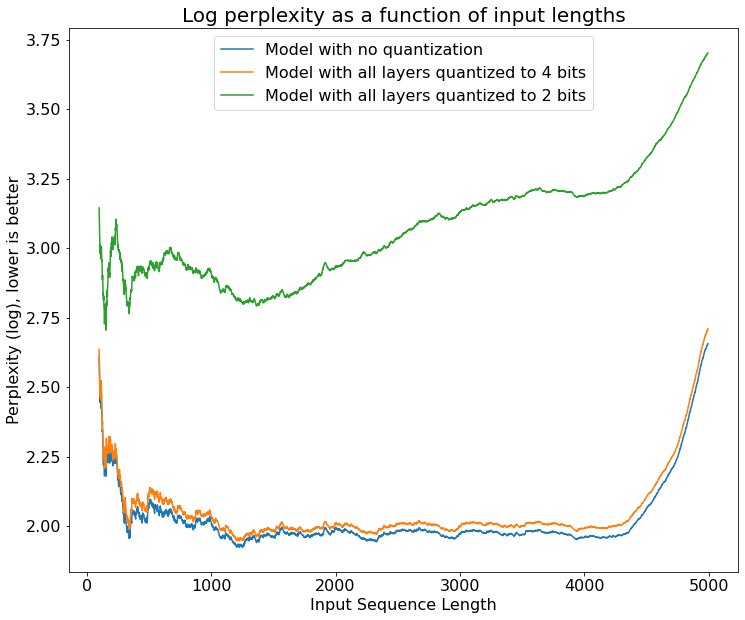

In [7]:
def get_perplexity_plots(data, indexes):
    plot_data = data.loc[indexes]
    
    fig, ax = plt.subplots(figsize = (12,10))
    ax.set_xlabel("Input Sequence Length", fontsize=16)
    ax.set_title('Log perplexity as a function of input lengths', fontsize=20)
    ax.set_ylabel("Perplexity (log), lower is better", fontsize=16)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)

    for idx, row in plot_data.iterrows():
        path = row['experiment_path']
        df = pd.read_csv(path)
        df = df.groupby(['input_length']).mean()
        X = df.index[100:]
        Y = df["overall_ppl"][100:]
        Y = np.log(Y)
        ax.plot(X, Y, "-", label=f"{row['experiment_description']}")
    plt.legend( loc='upper center', fontsize=16)

get_perplexity_plots(ppl_data, [0, 4, 18])

plt.savefig('figures/performance/01_ppl_quant_comp.png', facecolor='white', transparent=False)
plt.show()

# 2 bit vs 4-bit Quantization Analysis

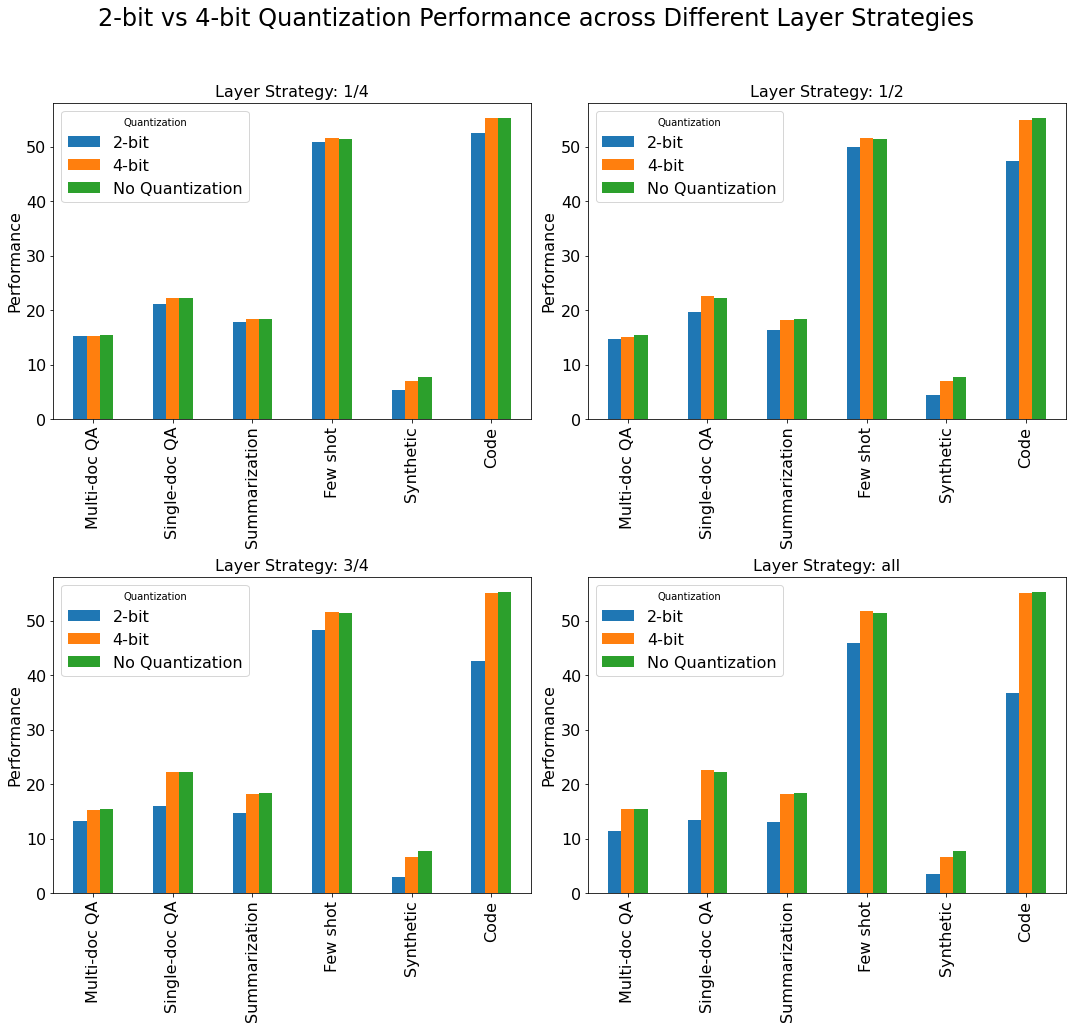

In [8]:
data_2bit = avg_data.query('num_bits == 2').groupby('layer_strategy').mean(LONG_BENCH_COLS)[LONG_BENCH_COLS]
data_4bit = avg_data.query('num_bits == 4').groupby('layer_strategy').mean(LONG_BENCH_COLS)[LONG_BENCH_COLS]
data_no_quant = avg_data.query('num_bits != 2 and num_bits != 4').groupby(['layer_strategy']).mean(LONG_BENCH_COLS)[LONG_BENCH_COLS] 

# Define layer strategies
layer_strategies = ['1_4', '1_2', '3_4', 'all']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, layer_strategy in enumerate(layer_strategies):
    ax = axes[i]
    data = pd.DataFrame({
        '2-bit': data_2bit.loc[layer_strategy],
        '4-bit': data_4bit.loc[layer_strategy],
        'No Quantization': data_no_quant.iloc[0]
    })
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Layer Strategy: {layer_strategy.replace("_", "/")}', fontsize=16)
    ax.set_ylabel('Performance', fontsize=16)
    ax.legend(title='Quantization', fontsize=16)
    ax.set_xticklabels(LONG_BENCH_COLS, fontsize=16)
    ax.yaxis.set_tick_params(labelsize=16)

plt.suptitle("2-bit vs 4-bit Quantization Performance across Different Layer Strategies", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/performance/02_avg_perf_quant_comp_subplots.png', facecolor='white', transparent=False)
plt.show()

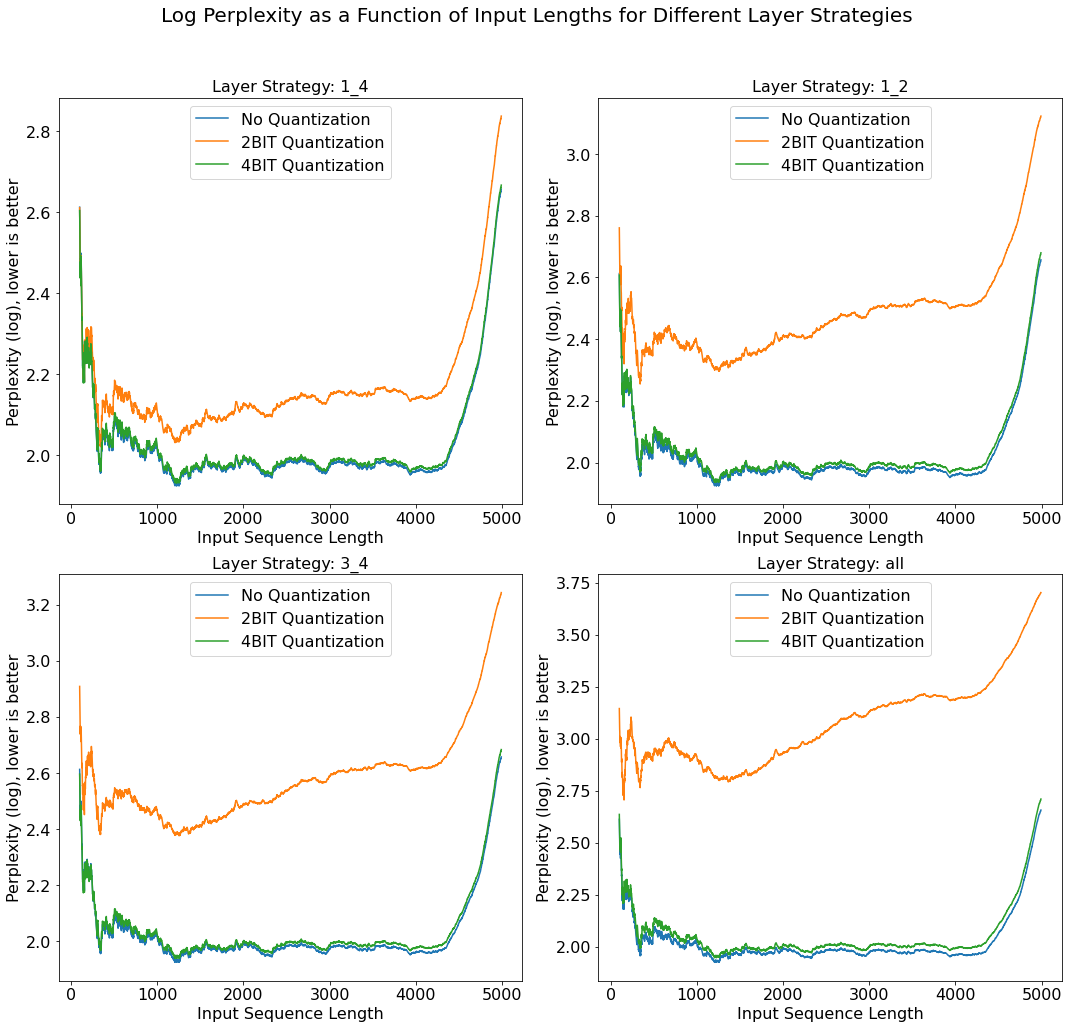

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming ppl_data is already loaded as a DataFrame
zero_indices = ppl_data.query('layer_strategy == "zero"')['experiment_path'].index
two_bit_indices = ppl_data.query('num_bits == 2')['experiment_path'].index
four_bit_indices = ppl_data.query('num_bits == 4')['experiment_path'].index

def get_perplexity_plot_average(data, indexes, description, ax):
    plot_data = data.loc[indexes]
    
    overall_ppl = []
    for idx, row in plot_data.iterrows():
        path = row['experiment_path']
        df = pd.read_csv(path)
        df = df.groupby(['input_length']).mean()
        X = df.index[100:]
        Y = df["overall_ppl"][100:]
        Y = np.log(Y)
        overall_ppl.append(Y)
    overall_ppl = np.array(overall_ppl).mean(axis = 0)

    ax.plot(X, overall_ppl, "-", label=description)
    ax.set_xlabel("Input Sequence Length", fontsize=16)
    ax.set_title('Log perplexity as a function of input lengths', fontsize=20)
    ax.set_ylabel("Perplexity (log), lower is better", fontsize=16)
    ax.legend(loc='upper center', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)
    
    return ax

# Define layer strategies
layer_strategies = ['1_4', '1_2', '3_4', 'all']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, layer_strategy in enumerate(layer_strategies):
    ax = axes[i]
    layer_two_bit_indices = ppl_data.query(f'num_bits == 2 and layer_strategy == "{layer_strategy}"')['experiment_path'].index
    layer_four_bit_indices = ppl_data.query(f'num_bits == 4 and layer_strategy == "{layer_strategy}"')['experiment_path'].index
    
    get_perplexity_plot_average(ppl_data, zero_indices, "No Quantization", ax)
    get_perplexity_plot_average(ppl_data, layer_two_bit_indices, "2BIT Quantization", ax)
    get_perplexity_plot_average(ppl_data, layer_four_bit_indices, "4BIT Quantization", ax)
    ax.set_title(f'Layer Strategy: {layer_strategy}', fontsize=16)

plt.suptitle("Log Perplexity as a Function of Input Lengths for Different Layer Strategies", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/performance/02_ppl_quant_comp_avg_subplots.png', facecolor='white', transparent=False)
plt.show()

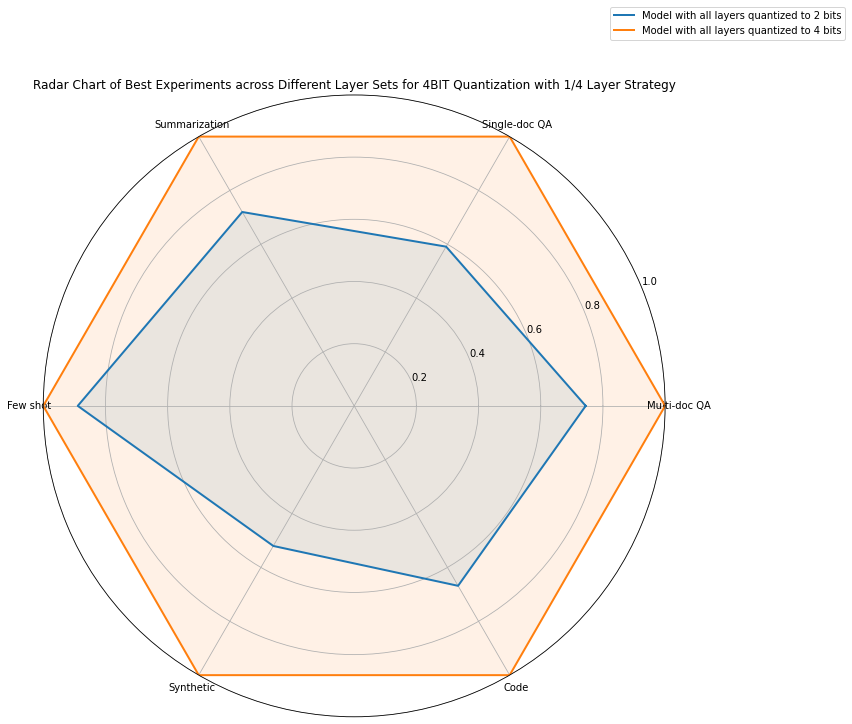

In [10]:
df = avg_data.query('layer_strategy == "all"')
df = df.sort_values(by = 'num_bits')
df = df.reset_index(drop=True)


linestyle = ['-','-']

columns_to_normalize = LONG_BENCH_COLS
df_normalized = df.copy()
df_normalized[columns_to_normalize] = df[columns_to_normalize] / df[columns_to_normalize].max()

categories = columns_to_normalize
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(projection='polar'))


for idx, desc in enumerate(df['experiment_description']):
    values = df_normalized.loc[idx, categories].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=2, linestyle= linestyle[idx], label=desc)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.15))
ax.set_ylim(0, 1)

plt.title("Radar Chart of Best Experiments across Different Layer Sets for 4BIT Quantization with 1/4 Layer Strategy")
plt.tight_layout()
plt.savefig('figures/performance/02_radar_quant_comp.png', facecolor='white',transparent=False)

# Layer Strategy Analysis

## Layer Strategy 1_4

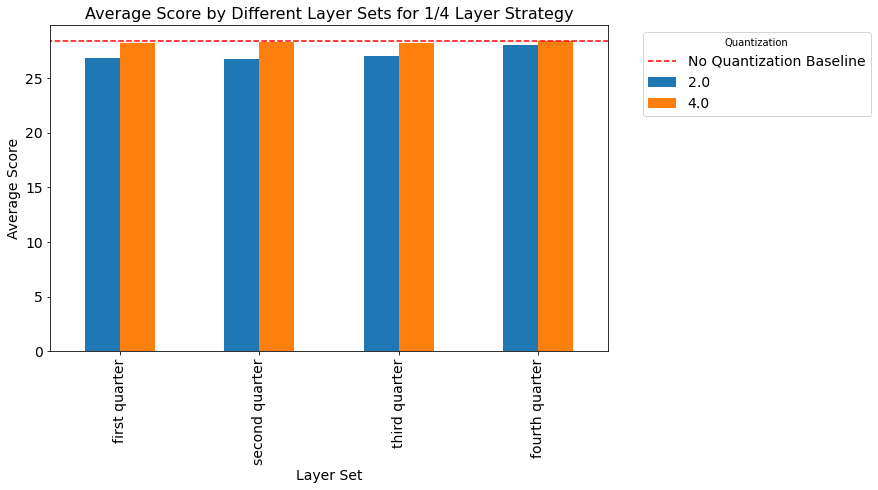

In [11]:
plot_df = avg_data.query('layer_strategy == "1_4"').groupby(['layer_set', 'num_bits']).mean('avg_score')['avg_score'].reset_index()
df_pivot = plot_df.pivot(index="layer_set", columns="num_bits", values="avg_score").reindex(['first quarter', 'second quarter', 'third quarter', 'fourth quarter'])
zero_avg_score = avg_data.query('layer_strategy == "zero"')['avg_score'].values[0]

# Creating the grouped bar chart
df_pivot.plot(kind="bar", figsize=(10, 6))
plt.hlines(y=zero_avg_score, xmin=-1, xmax=4, colors='r', linestyles='dashed', label='No Quantization Baseline')
plt.title("Average Score by Different Layer Sets for 1/4 Layer Strategy", fontsize=16)
plt.xlabel("Layer Set", fontsize=14)
plt.ylabel("Average Score", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Quantization', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('figures/performance/03_avg_perf_layer_set_1_4.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

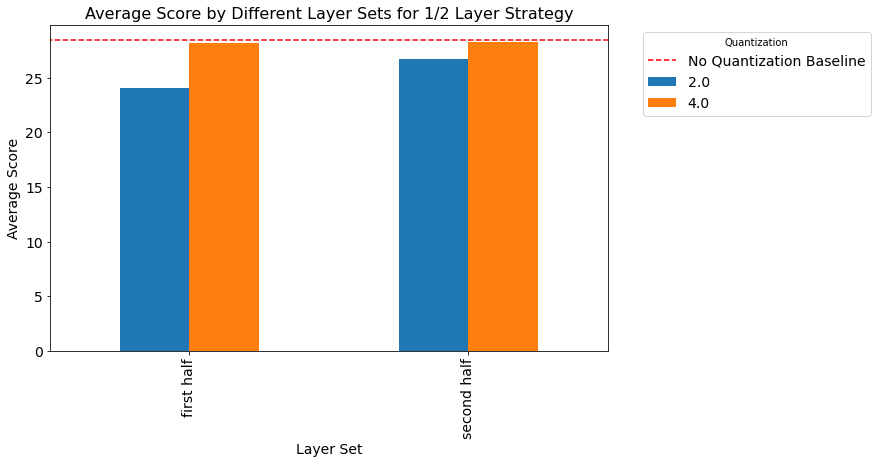

In [12]:
plot_df = avg_data.query('layer_strategy == "1_2"').groupby(['layer_set', 'num_bits']).mean('avg_score')['avg_score'].reset_index()
plot_df['layer_set'] = plot_df.layer_set.map({'first quarter': 'first half', 'second quarter': 'second half'})
df_pivot = plot_df.pivot(index="layer_set", columns="num_bits", values="avg_score").reindex(['first half', 'second half'])
zero_avg_score = avg_data.query('layer_strategy == "zero"')['avg_score'].values[0]

# Creating the grouped bar chart
df_pivot.plot(kind="bar", figsize=(10, 6))
plt.hlines(y=zero_avg_score, xmin=-1, xmax=4, colors='r', linestyles='dashed', label='No Quantization Baseline')
plt.title("Average Score by Different Layer Sets for 1/2 Layer Strategy", fontsize=16)
plt.xlabel("Layer Set", fontsize=14)
plt.ylabel("Average Score", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Quantization', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('figures/performance/03_avg_perf_layer_set_1_2.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

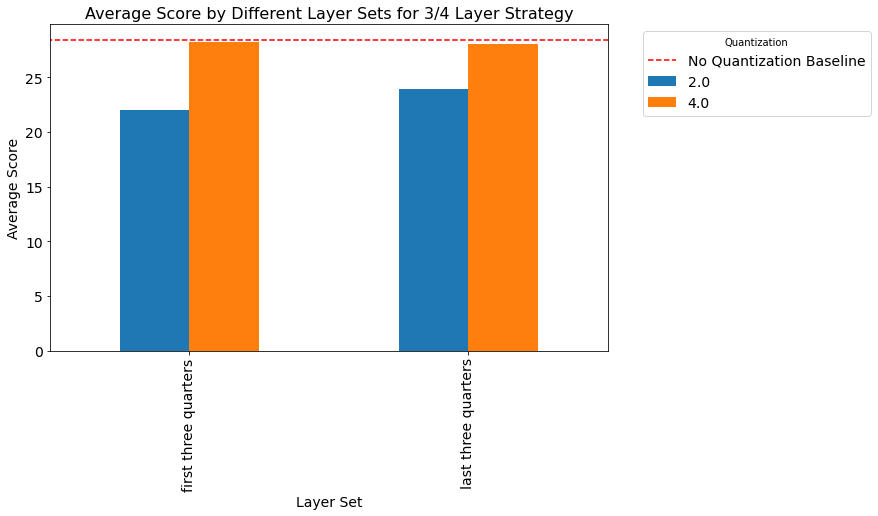

In [13]:
plot_df = avg_data.query('layer_strategy == "3_4"').groupby(['layer_set', 'num_bits']).mean('avg_score')['avg_score'].reset_index()
plot_df['layer_set'] = plot_df.layer_set.map({'first quarter': 'first three quarters', 'second quarter': 'last three quarters'})
df_pivot = plot_df.pivot(index="layer_set", columns="num_bits", values="avg_score").reindex(['first three quarters', 'last three quarters'])
zero_avg_score = avg_data.query('layer_strategy == "zero"')['avg_score'].values[0]

# Creating the grouped bar chart
df_pivot.plot(kind="bar", figsize=(10, 6))
plt.hlines(y=zero_avg_score, xmin=-1, xmax=4, colors='r', linestyles='dashed', label='No Quantization Baseline')
plt.title("Average Score by Different Layer Sets for 3/4 Layer Strategy", fontsize=16)
plt.xlabel("Layer Set", fontsize=14)
plt.ylabel("Average Score", fontsize=14)
plt.legend(title="Num Bits", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Quantization', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('figures/performance/03_avg_perf_layer_set_3_4.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

# Tripartite Network

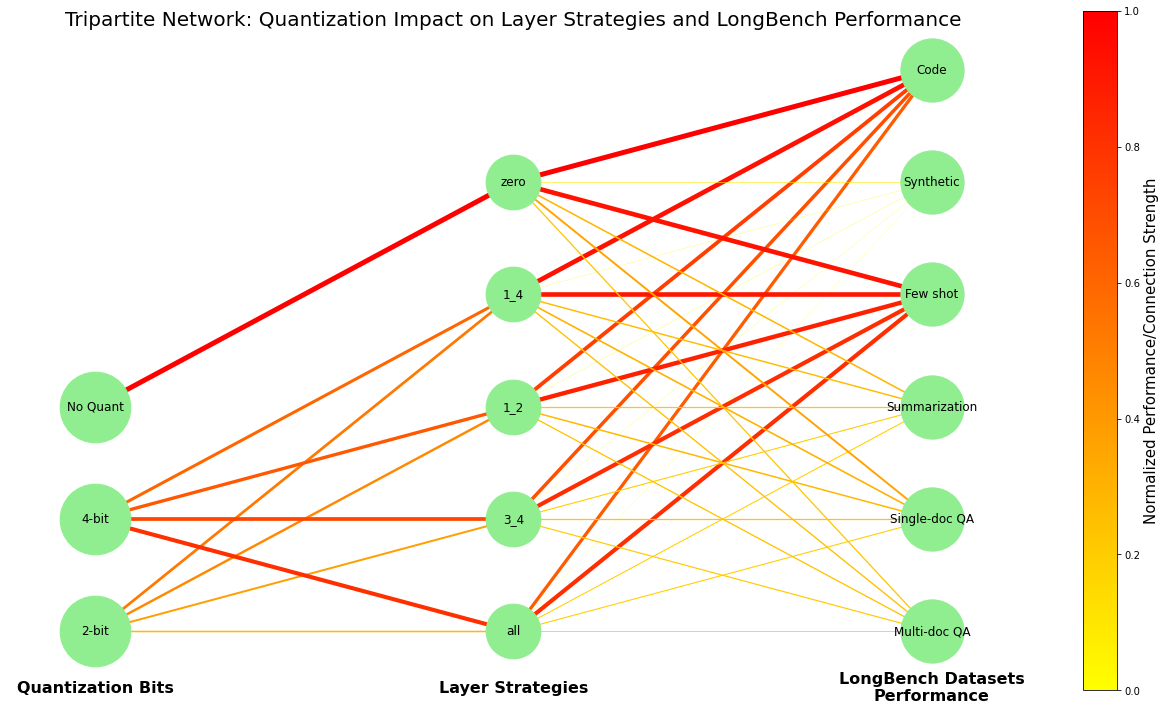

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming avg_data is your DataFrame
# If it's not, replace this line with your actual data loading
# avg_data = pd.read_csv('your_data.csv')

# Create a new graph
G = nx.Graph()

# Get unique quantization bits, strategies, and datasets
quant_bits = avg_data['num_bits'].unique()
quant_bits = [str(int(bit)) + '-bit' if not pd.isna(bit) else 'No Quant' for bit in quant_bits]
quant_bits.sort(key=lambda x: float('inf') if x == 'No Quant' else int(x.split('-')[0]))

# Sort strategies in the specified order
strategy_order = ['all', '3_4', '1_2', '1_4', 'zero']
strategies = sorted(avg_data['layer_strategy'].unique(), key=lambda x: strategy_order.index(x) if x in strategy_order else len(strategy_order))

datasets = ['Multi-doc QA', 'Single-doc QA', 'Summarization', 'Few shot', 'Synthetic', 'Code']

# Add nodes
G.add_nodes_from(quant_bits, bipartite=0)
G.add_nodes_from(strategies, bipartite=1)
G.add_nodes_from(datasets, bipartite=2)

# Normalize performances to [0, 1] for color mapping (layer_strategy to datasets)
min_perf = avg_data[datasets].min().min()
max_perf = avg_data[datasets].max().max()

# Count occurrences of each strategy for each quantization bit
strategy_counts = avg_data.fillna(0).groupby(['num_bits', 'layer_strategy']).mean(['avg_score'])['avg_score'].unstack(fill_value=0)
strategy_counts_normalized = (strategy_counts - strategy_counts.mean()) / strategy_counts.std()

# Add edges
for _, row in avg_data.iterrows():
    quant = 'No Quant' if pd.isna(row['num_bits']) else f"{int(row['num_bits'])}-bit"
    strategy = row['layer_strategy']
    
    # Add edge between quant and strategy
    if quant == 'No Quant' and strategy == 'zero':
        normalized_count = 1  # Full strength for this connection
    elif quant != 'No Quant':
        normalized_count = strategy_counts_normalized.loc[row['num_bits'], strategy]
    else:
        continue  # Skip other connections for 'No Quant'
    
    G.add_edge(quant, strategy, weight=normalized_count, color=normalized_count)
    
    for dataset in datasets:
        performance = row[dataset]
        normalized_performance = (performance - min_perf) / (max_perf - min_perf)
        G.add_edge(strategy, dataset, weight=normalized_performance, color=normalized_performance)

# Create the layout
pos = {}
pos.update((node, (0, index)) for index, node in enumerate(quant_bits))
pos.update((node, (1, index)) for index, node in enumerate(strategies))
pos.update((node, (2, index)) for index, node in enumerate(datasets))

# Draw the graph
plt.figure(figsize=(18, 10))
nx.draw_networkx_nodes(G, pos, nodelist=quant_bits, node_color='lightgreen', node_size=5000)
nx.draw_networkx_nodes(G, pos, nodelist=strategies, node_color='lightgreen', node_size=3000)
nx.draw_networkx_nodes(G, pos, nodelist=datasets, node_color='lightgreen', node_size=4000)
nx.draw_networkx_labels(G, pos)

# Draw edges
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, edge_color=colors, width=[w*5 for w in weights], edge_cmap=plt.cm.autumn_r)

plt.text(0, -0.5, 'Quantization Bits', ha='center', va='center', fontsize=16, fontweight='bold')
plt.text(1, -0.5, 'Layer Strategies', ha='center', va='center', fontsize=16, fontweight='bold')
plt.text(2, -0.5, 'LongBench Datasets\nPerformance', ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Tripartite Network: Quantization Impact on Layer Strategies and LongBench Performance", fontsize=20,y = 0.97)
plt.axis('off')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.autumn_r, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Normalized Performance/Connection Strength', fontsize=15)

plt.tight_layout()
plt.savefig('figures/performance/04_tripartite_network.png', facecolor='white', transparent=False)
plt.show()